# Chapter 8 - Tree-based Methods

In [199]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import pydot
from IPython.display import Image

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### § 8.1.1 Regression Trees

In [64]:
df = pd.read_csv('Data/Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 41.1+ KB


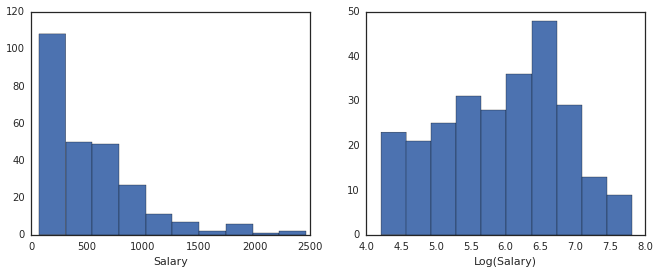

In [47]:
X = df[['Years', 'Hits']].as_matrix()
y = np.log(df.Salary.as_matrix())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.as_matrix())
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)')

In [48]:
regr = tree.DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

### Figure 8.1

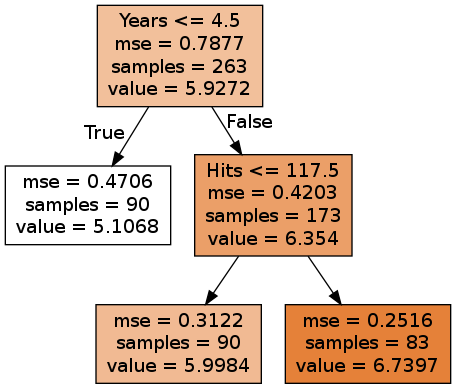

In [14]:
dot_data = StringIO() 
tree.export_graphviz(regr, out_file=dot_data, feature_names=['Years', 'Hits'], filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

###  Figure 8.2

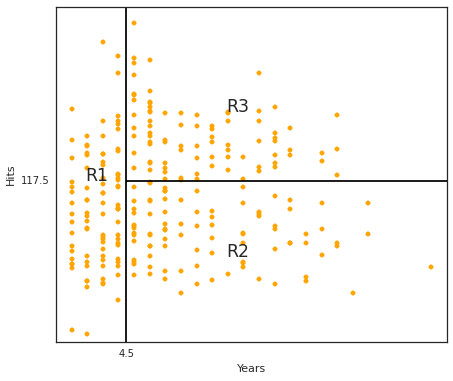

In [15]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([4.5])
plt.yticks([117.5])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')

### Pruning
This is currently not supported in scikit-learn. See first point under 'disadvantages of decision trees in the <A href='http://scikit-learn.github.io/dev/modules/tree.html#'>documentation</A>. Implementation has been <A href='https://github.com/scikit-learn/scikit-learn/pull/941'>discussed</A> but Random Forests have better predictive qualities than a single pruned tree anyway if I understand correctly.
    

### § 8.1.2 Classification Trees

In [20]:
df2 = pd.read_csv('Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
AHD          297 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 31.3+ KB


In [21]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

In [22]:
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

In [40]:
clf = tree.DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=3, max_leaf_nodes=6, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [41]:
clf.score(X2,y2)

0.7407407407407407

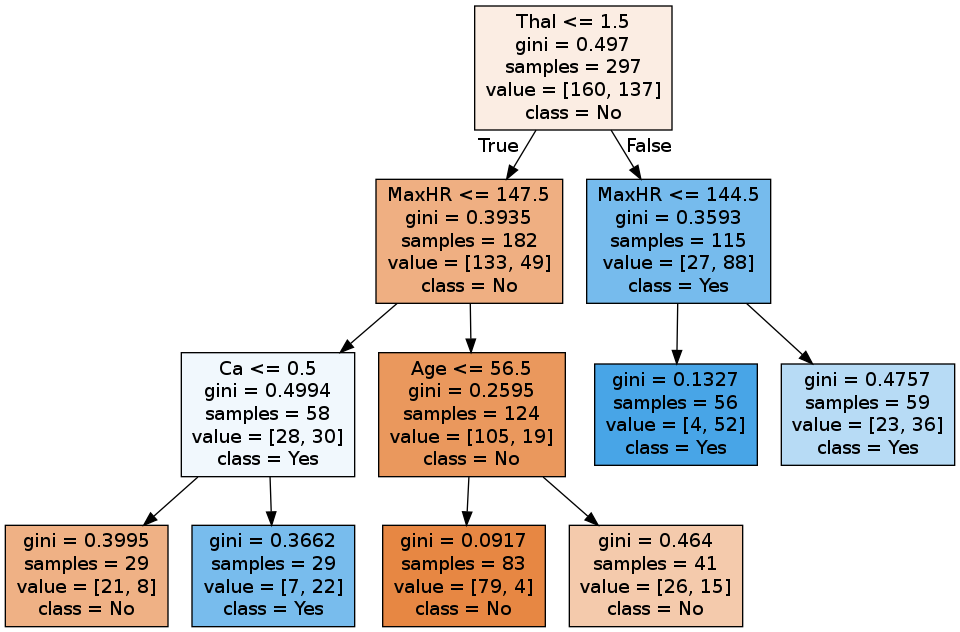

In [207]:
dot_data2 = StringIO() 
tree.export_graphviz(clf, out_file=dot_data2, feature_names=np.array(X2.columns), class_names=['No', 'Yes'], filled=True)
graph2 = pydot.graph_from_dot_data(dot_data2.getvalue())
Image(graph2.create_png())

### § 8.2.2 Random Forests

In [99]:
clf2 = RandomForestClassifier(n_estimators=50, max_depth=3)
clf2.fit(X2,y2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
clf2.score(X2,y2)

0.87878787878787878

In [101]:
clf2.feature_importances_

array([  3.87723285e-02,   3.32248858e-02,   1.14337139e-01,
         2.79398139e-02,   2.73284152e-02,   1.14801064e-04,
         8.22192088e-03,   1.29914836e-01,   9.33648168e-02,
         1.26655779e-01,   5.66672053e-02,   1.93714178e-01,
         1.49743881e-01])

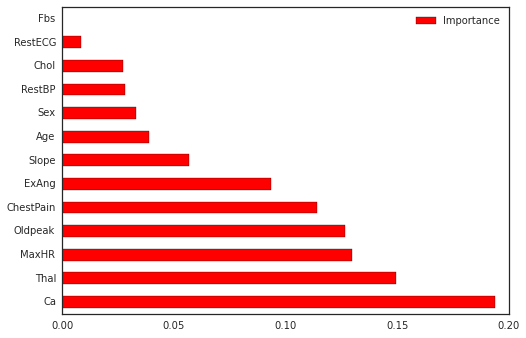

In [102]:
Importance = pd.DataFrame({'Importance':clf2.feature_importances_}, index=X2.columns)
Importance.sort('Importance', axis=0, ascending=False).plot(kind='barh', color='r', )

## Lab

### § 8.3.1 Fitting Classification Trees

In [2]:
# In R, I exported the dataset from package 'ISLR' to a csv file.
df3 = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1)
df3.head()

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  

In [3]:
df3['High'] = df3.Sales.map(lambda x: 1 if x > 8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]
df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int32
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null int64
dtypes: float64(1), int32(1), int64(10)
memory usage: 39.1 KB


In [4]:
df3.head()

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  High  
0         17      1   1     1  
1         10      1   1     1  
2         12      1   1     1  
3         14      1   1     0  
4         13      1   0     0  

In [15]:
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [37]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

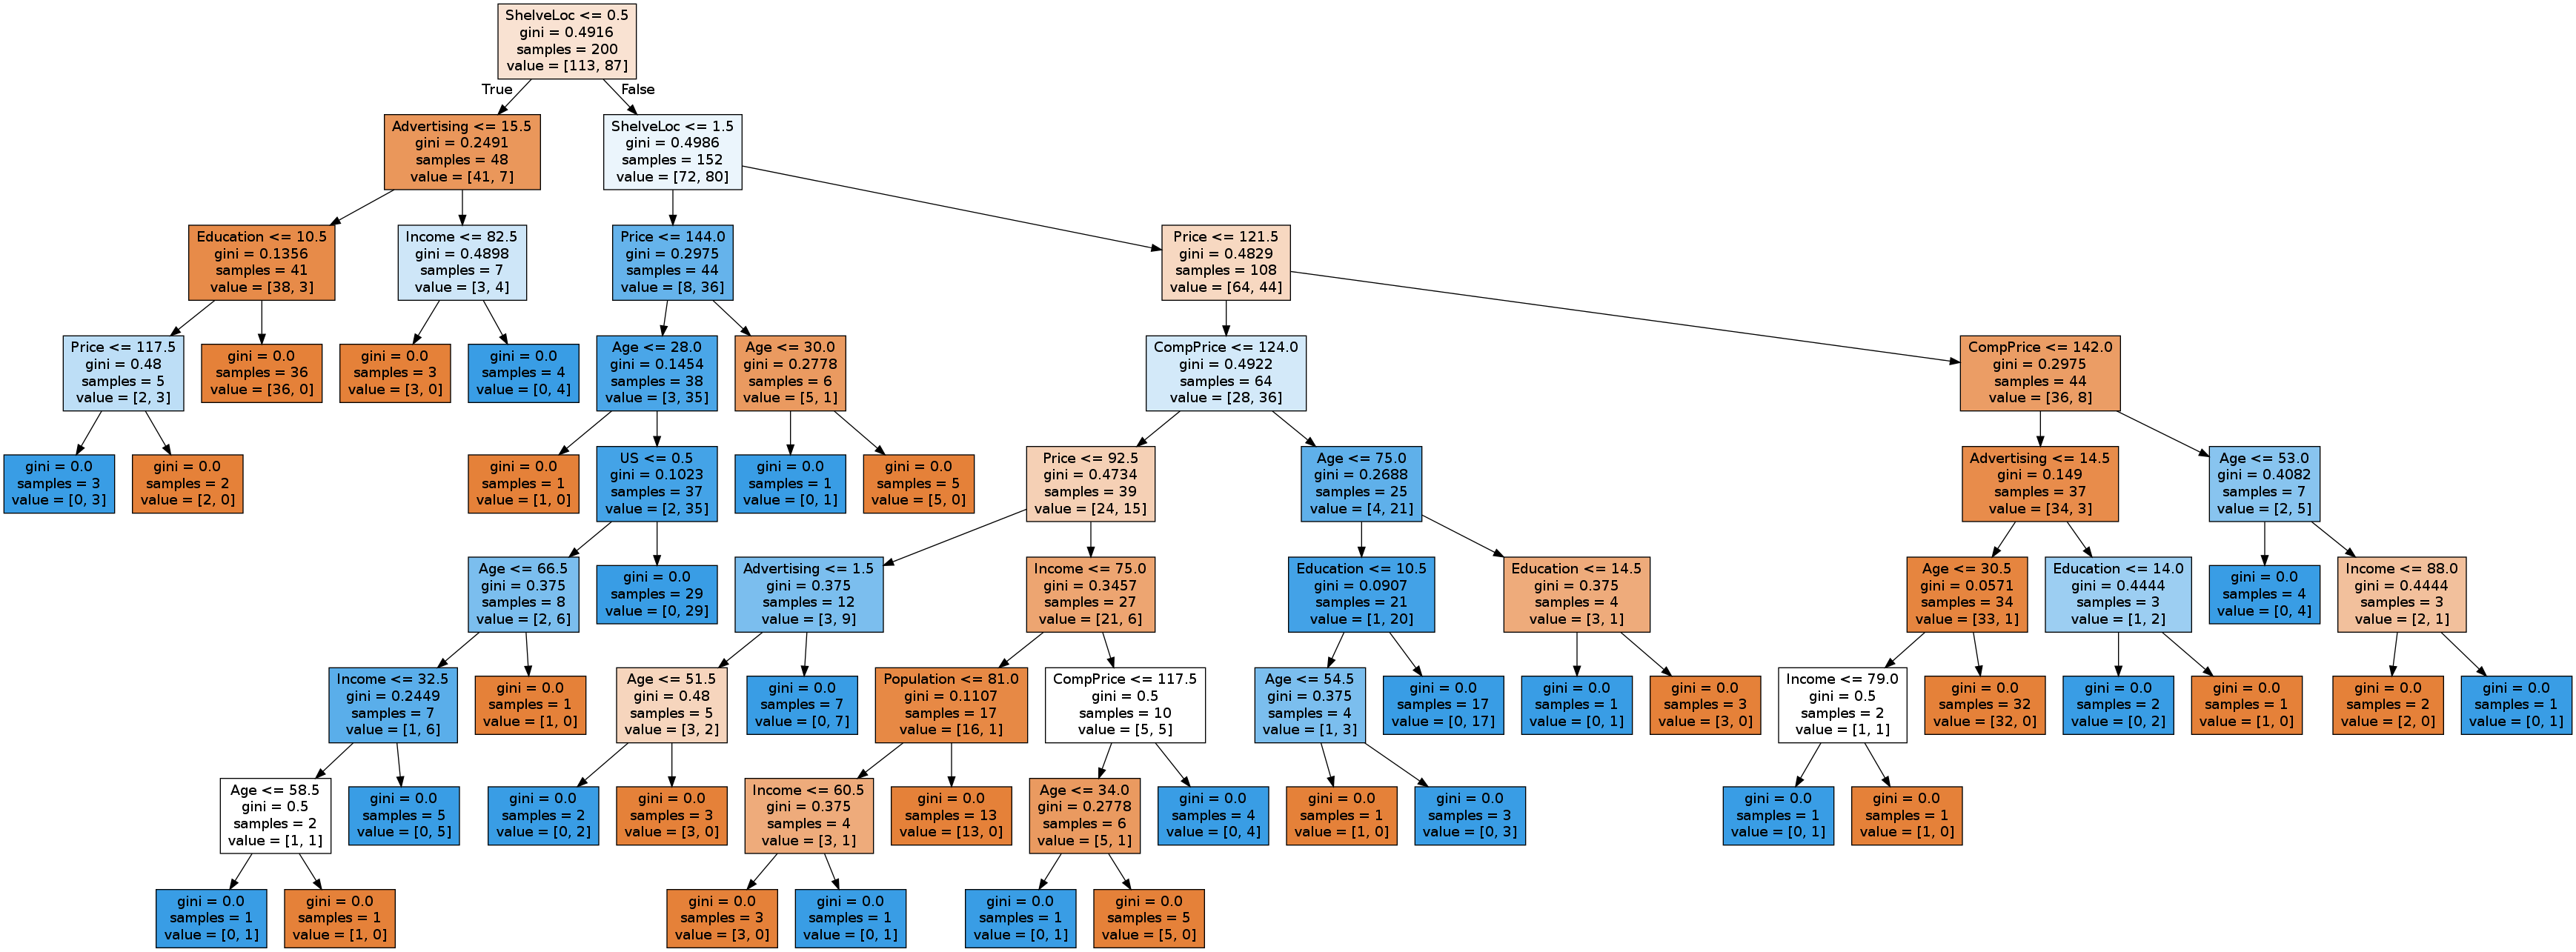

In [42]:
dot_data3 = StringIO() 
tree.export_graphviz(clf, out_file=dot_data3, feature_names=np.array(X.columns), filled=True)
graph3 = pydot.graph_from_dot_data(dot_data3.getvalue())
Image(graph3.create_png())

In [38]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [39]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True       No  Yes
Predicted         
No         90   25
Yes        33   52

In [41]:
# Precision of the model using test data is 72%
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.78      0.73      0.76       123
          1       0.61      0.68      0.64        77

avg / total       0.72      0.71      0.71       200



Pruning not implemented in scikit-learn.

### § 8.3.2 Fitting Regression Trees

In [68]:
boston_df = pd.read_csv('Data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [76]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [179]:
# Pruning not supported. Choosing max depth 3)
regr2 = tree.DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train.as_matrix(), y_train)
pred = regr2.predict(X_test)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

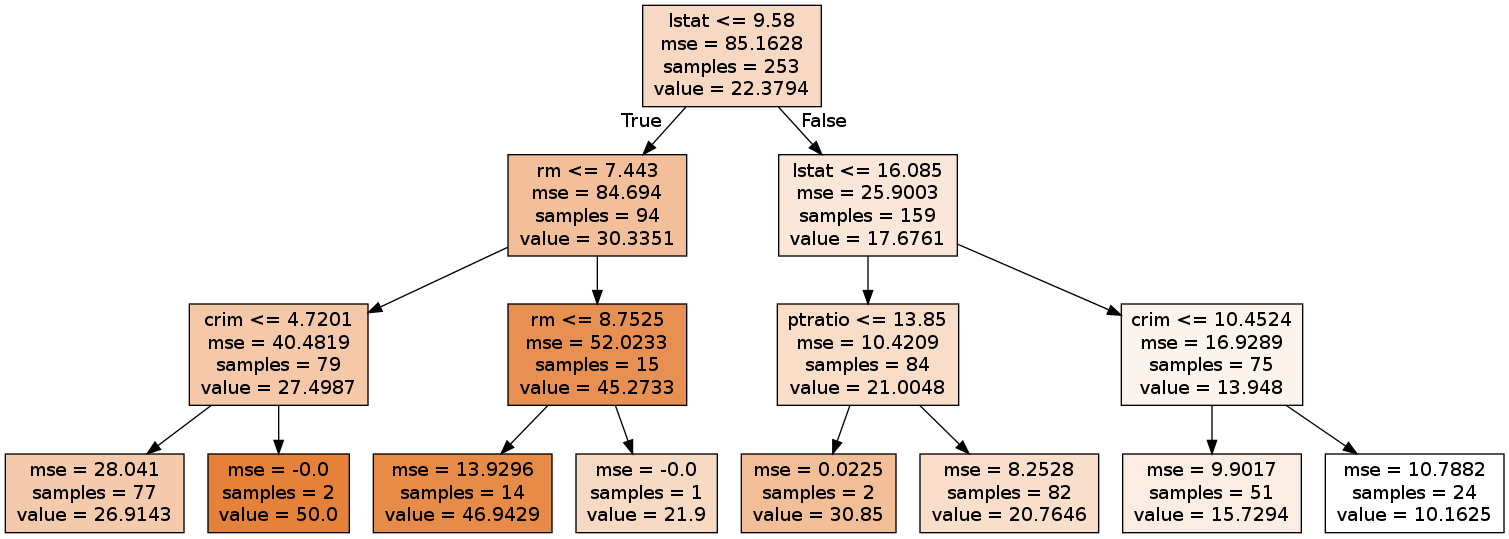

In [136]:
dot_data = StringIO() 
tree.export_graphviz(regr2, out_file=dot_data, feature_names=X.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

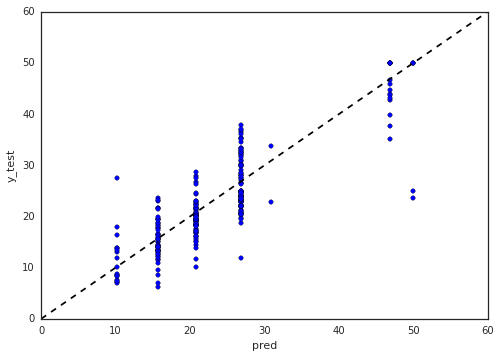

In [180]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [181]:
mean_squared_error(y_test, pred)

25.400567637582082

### § 8.3.3 Bagging and Random Forests

In [196]:
regr3 = RandomForestRegressor()
bagging = BaggingRegressor(regr3)

regr3.fit(X_train, y_train)
pred = regr3.predict(X_test)

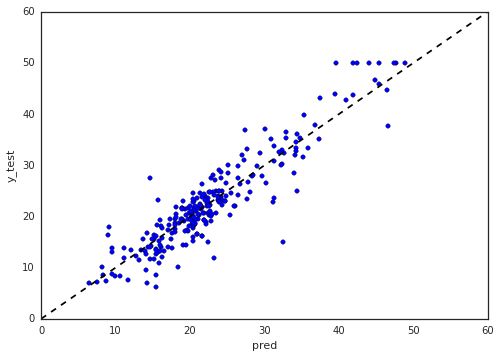

In [194]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [197]:
mean_squared_error(y_test, pred)

10.750572727272724

In [198]:
pd.Series(regr3.feature_importances_, index=X.columns)

crim       0.028656
zn         0.002174
indus      0.003356
chas       0.000532
nox        0.024320
rm         0.271433
age        0.016571
dis        0.039077
rad        0.001203
tax        0.030700
ptratio    0.020500
black      0.007888
lstat      0.553589
dtype: float64

### § 8.3.4 Boosting

In [201]:
regr4 = GradientBoostingRegressor()
regr4.fit(X_train, y_train)
mean_squared_error(y_test, regr4.predict(X_test))

9.3558780318991968

In [202]:
pd.Series(regr4.feature_importances_, index=X.columns)

crim       0.083143
zn         0.017593
indus      0.043481
chas       0.011641
nox        0.047975
rm         0.146735
age        0.088867
dis        0.153696
rad        0.024375
tax        0.052899
ptratio    0.055075
black      0.077678
lstat      0.196841
dtype: float64